# Introduction

The Local Outlier Factor (LOF) algorithm is an unsupervised anomaly detection method which computes the local density deviation of a given data point with respect to its neighbors. It considers as outliers the samples that have a substantially lower density than their neighbors. This example shows how to use LOF for outlier detection which is the default use case of this estimator in scikit-learn. Note that when LOF is used for outlier detection it has no predict, decision_function and score_samples methods. See the User Guide for details on the difference between outlier detection and novelty detection and how to use LOF for novelty detection.

The number of neighbors considered (parameter n_neighbors) is typically set 1) greater than the minimum number of samples a cluster has to contain, so that other samples can be local outliers relative to this cluster, and 2) smaller than the maximum number of close by samples that can potentially be local outliers. In practice, such information is generally not available, and taking n_neighbors=20 appears to work well in general.

# Import Libraries

We will import **numpy** and **matplotlib** for data manipulation and visualization respectively. We will also import **LocalOutlierFactor** from **sklearn.neighbors** for outlier detection.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# Generate Data with Outliers

We will generate a dataset of 120 data points with 100 inliers and 20 outliers. We will then plot the data to visualize the outliers.

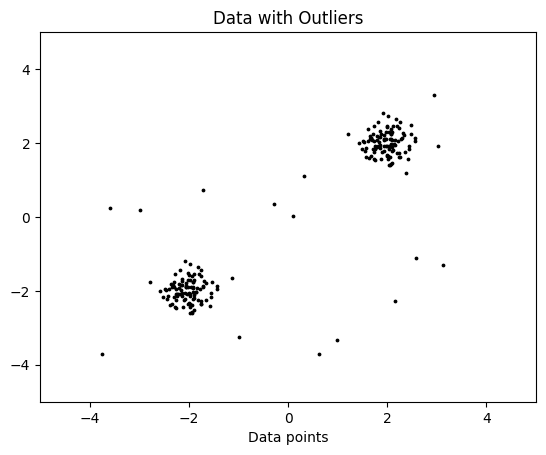

In [5]:
np.random.seed(42)

X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[X_inliers, X_outliers]

n_outliers = len(X_outliers)
ground_truth = np.ones(len(X), dtype=int)
ground_truth[-n_outliers:] = -1

plt.scatter(X[:, 0], X[:, 1], color="k", s=3.0)
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.xlabel("Data points")
plt.title("Data with Outliers")
plt.show()

# Fit the Model for Outlier Detection

We will use **LocalOutlierFactor** to fit the model for outlier detection and compute the predicted labels of the training samples.

In [6]:
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = clf.fit_predict(X)
n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_

# Plot Results

We will plot the data points with circles whose radius is proportional to the outlier scores.

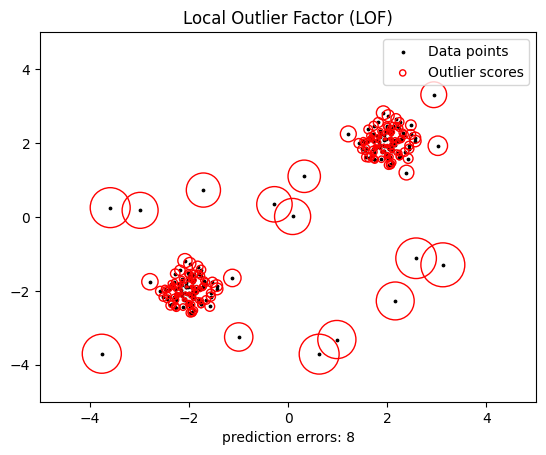

In [7]:
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerPathCollection


def update_legend_marker_size(handle, orig):
    "Customize size of the legend marker"
    handle.update_from(orig)
    handle.set_sizes([20])


plt.scatter(X[:, 0], X[:, 1], color="k", s=3.0, label="Data points")
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
scatter = plt.scatter(
    X[:, 0],
    X[:, 1],
    s=1000 * radius,
    edgecolors="r",
    facecolors="none",
    label="Outlier scores",
)
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.xlabel("prediction errors: %d" % (n_errors))
plt.legend(
    handler_map={scatter: HandlerPathCollection(update_func=update_legend_marker_size)}
)
plt.title("Local Outlier Factor (LOF)")
plt.show()

# Summary

In this lab, we have learned how to use Local Outlier Factor (LOF) for outlier detection. We have generated a dataset with outliers, fit the model for outlier detection, and plotted the results. LOF is a powerful unsupervised machine learning method that can be used to detect anomalies in a wide range of applications.